In [4]:
import Access_Keys

In [ ]:
URL = 'http://www.cryptodatadownload.com/cdd/Binance_BTCUSDT_d.csv'

In [ ]:
from urllib.request import urlretrieve
urlretrieve(URL, 'Binance_BTCUSDT_d.csv')

('Binance_BTCUSDT_d.csv', <http.client.HTTPMessage at 0x1a9600791c8>)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('Binance_BTCUSDT_d.csv',skiprows=1,parse_dates=False,usecols=['date','open','close','high','low'])
data.head()

,date,open,high,low,close
0,2021-02-02 00:00:00,33517.09,33649.90,33418.00,33612.24
1,2021-02-01 00:00:00,33092.97,34717.27,32296.16,33526.37
2,2021-01-31 00:00:00,34262.89,34342.69,32171.67,33092.98
3,2021-01-30 00:00:00,34246.28,34933.00,32825.00,34262.88
4,2021-01-29 00:00:00,33368.18,38531.90,31915.40,34252.20


In [ ]:
data.tail()

,date,open,high,low,close
1262,2017-08-21 00:00:00,4086.29,4119.62,3911.79,4016.00
1263,2017-08-20 00:00:00,4139.98,4211.08,4032.62,4086.29
1264,2017-08-19 00:00:00,4108.37,4184.69,3850.00,4139.98
1265,2017-08-18 00:00:00,4285.08,4371.52,3938.77,4108.37
1266,2017-08-17 00:00:00,4469.93,4485.39,4200.74,4285.08


In [ ]:
for i in range(1143,1267):
  data['date'][i]  = data['date'][i]  + ' 00:00:00'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data['date'][1143]

'2017-12-18 00:00:00'

In [ ]:
data['timestamp'] = OpenBlender.dateToUnix(data['date'], 
                                           date_format = '%Y-%m-%d %H:%M:%S', 
                                           timezone = 'GMT')

In [ ]:
data.dtypes

date          object
open         float64
high         float64
low          float64
close        float64
timestamp    float64
dtype: object

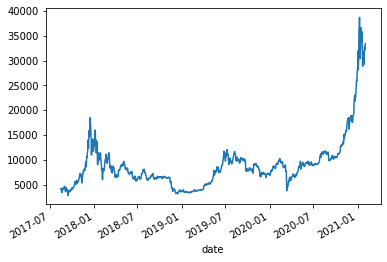

In [ ]:
data['low'].plot()

In [ ]:
%pip install OpenBlender

In [ ]:
# The following code is from https://towardsdatascience.com/what-moves-bitcoin-c06f7b46d2e4
# with my user tokens

import OpenBlender

In [1]:
import json

In [2]:
import getpass

In [6]:
OpenBlender_api_token = Access_Keys.OpenBlender_api_token;

In [ ]:
# Now, let's search on OpenBlender
search_keyword = 'technology'
df = df.sort_values('timestamp').reset_index(drop = True)
print('From : ' + OpenBlender.unixToDate(min(data.timestamp)))
print('Until: ' + OpenBlender.unixToDate(max(data.timestamp)))
# Pass timestamp column and search keywords as parameters
OpenBlender.searchTimeBlends(OpenBlender_api_token, data.timestamp, search_keyword)

From : 17-08-2017 00:00:00
Until: 02-02-2021 00:00:00


[{'description': 'NPR Science News daily headlines',
  'features': ['headline', 'publisher', 'timestamp', 'title', 'url'],
  'id_dataset': '5d57204d9516293a12ad4f70',
  'intersection': '100%',
  'name': 'NPR Science News',
  'num_observations': 1924,
  'url': 'https://www.openblender.io/#/dataset/explore/5d57204d9516293a12ad4f70'},
 {'description': 'NPR Technology News daily headlines',
  'features': ['headline', 'publisher', 'timestamp', 'title', 'url'],
  'id_dataset': '5d5ab4259516296e5749de83',
  'intersection': '100%',
  'name': 'NPR Technology News',
  'num_observations': 1653,
  'url': 'https://www.openblender.io/#/dataset/explore/5d5ab4259516296e5749de83'},
 {'description': 'Daily news headlines of The Independent Technology',
  'features': ['headline', 'publisher', 'timestamp', 'title', 'url'],
  'id_dataset': '5d86608c9516296ba7e6a437',
  'intersection': '100%',
  'name': 'The Independent Technology headlines',
  'num_observations': 4248,
  'url': 'https://www.openblender.io/

In [ ]:
id_list = ['5d5ab15c9516296e5749de7a',# Buissness insider Technology news
           ]

In [ ]:
action = 'API_getObservationsFromDataset'

parameters = {
        'token':OpenBlender_api_token,
        'id_dataset': '5d5ab15c9516296e5749de7a',
        # 'date_filter': {'start_date': '2020-08-17','end_date': '2020-08-20'},
        'drop_features': ['url','publisher']
      }

In [ ]:
response = OpenBlender.call(action, parameters)

Task ID: '602d24640895fafb4a9d8d4b'.
Total estimated consumption: 500.6 processing units.
Task confirmed. Starting download..
3.45 %
6.9 %
10.34 %
13.79 %
17.24 %
20.69 %
24.14 %
27.59 %
31.03 %
34.48 %
37.93 %
41.38 %
44.83 %
48.28 %
51.72 %
55.17 %
58.62 %
62.07 %
65.52 %
68.97 %
72.41 %
75.86 %
79.31 %
82.76 %
86.21 %
89.66 %
93.1 %
96.55 %
100.0 % completed.


In [ ]:
df = pd.read_json(json.dumps(response['sample'])
                  ,convert_dates=True,
                  convert_axes=False)
df.sort_values('timestamp', ascending=False)
df.head()

,headline,timestamp,title
0,The firm has thus far inked Showcase deals wit...,2021-02-17 11:53:59,Google is reportedly close to a $30 million an...
1,TikTok breaches consumer rights by misleading ...,2021-02-17 11:26:50,TikTok breaches users' rights and fails to pro...
2,"""Fortnite"" developer Epic Games said in an EU ...",2021-02-17 10:27:04,'Fortnite' maker Epic Games is taking its war ...
3,Jeff Bezos. Drew Angerer/Getty Images Jeff Be...,2021-02-17 10:12:02,Jeff Bezos has taken back the title of the wor...
4,,2021-02-17 08:03:22,10 things in tech you need to know today


In [ ]:
df.shape

(8610, 3)

In [ ]:
df[df['title'].str.contains("bitcoin|Bitcoin")].shape

(27, 3)

action = 'API_createTextVectorizer'
 # Buissness insider id: 60195cdc951629710cbdba95f8RXtKeDpukuavetT1zyFlCtr86NKI
vectorizer_parameters = {
    'token' : OpenBlender_api_token,
    'name' : 'News Headlines',
    'anchor':{'id_dataset' : '5d5ab15c9516296e5749de7a', 'include_features' : ['title']},
    'ngram_range' : {'min' : 1, 'max' : 2},
    'language' : 'en',
    'remove_stop_words' : 'on',
    'min_count_limit' : 2
}

parameters = { 
   'token': OpenBlender_api_token ,
   'id_dataset':'5d5ab15c9516296e5749de7a',
   'target_threshold' : {'feature':'change','success_thr_over':0},
   'lag_target_feature' : {'feature':'change_over_0', 'periods':1},
   'blends':[{'id_blend':'5de020789516293a833f5818',
               'blend_type' : 'text_ts',
               'restriction' : 'predictive',
               'blend_class' : 'closest_observation', 
               'specifications':{'time_interval_size' : 3600*12 }}],
   'date_filter':{'start_date':'2017-08-20T16:59:35.825Z',
                   'end_date':'2021-02-2T17:59:35.825Z'},
   'drop_non_numeric' : 1
}

def pullObservationsToDF(parameters):
    action = 'API_getObservationsFromDataset'
    df = pd.read_json(json.dumps(OpenBlender.call(action,parameters)['sample'])
                    ,convert_dates=False,convert_axes=False).sort_values('timestamp', ascending=False)
    df.reset_index(drop=True, inplace=True)
    return df
df = pullObservationsToDF(parameters)